# Analysis of the fligth into the ceiling on 10/28/2024 #
Imports

In [16]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [31]:
# Load the JSON data from the file
with open('hardware.json', 'r') as file:
    data = json.load(file)

# Extract the "drone" data
drone_data = data.get("drone", {})

# Print out the keys for all the data types within "drone"
print("Keys in drone data:")
for key in drone_data.keys():
    print(f'\"{key}\",')

Keys in drone data:
"ae483log.p_x",
"ae483log.p_y",
"ae483log.p_z",
"ae483log.psi",
"ae483log.theta",
"ae483log.phi",
"ae483log.v_x",
"ae483log.v_y",
"ae483log.v_z",
"stateEstimate.x",
"stateEstimate.y",
"stateEstimate.z",
"stateEstimate.yaw",
"stateEstimate.pitch",
"stateEstimate.roll",
"stateEstimate.vx",
"stateEstimate.vy",
"stateEstimate.vz",
"ae483log.w_x",
"ae483log.w_y",
"ae483log.w_z",
"ae483log.n_x",
"ae483log.n_y",
"ae483log.r",
"ae483log.a_z",
"ae483log.p_x_des",
"ae483log.p_y_des",
"ae483log.p_z_des",
"ctrltarget.x",
"ctrltarget.y",
"ctrltarget.z",
"ae483log.m_1",
"ae483log.m_2",
"ae483log.m_3",
"ae483log.m_4",
"extravars.set_motors",
"extravars.a_x",
"extravars.a_y",
"extravars.v_x_int",
"extravars.v_y_int",
"extravars.v_z_int",
"extravars.p_x_int",
"extravars.p_y_int",
"extravars.p_z_int",
"extravars.a_x_in_W",
"extravars.a_y_in_W",
"extravars.a_z_in_W",
"extravars.n_x_age",
"extravars.n_y_age",
"extravars.r_age",
"extravars.a_x_0",
"extravars.a_y_0",
"extravars.a_z_0",


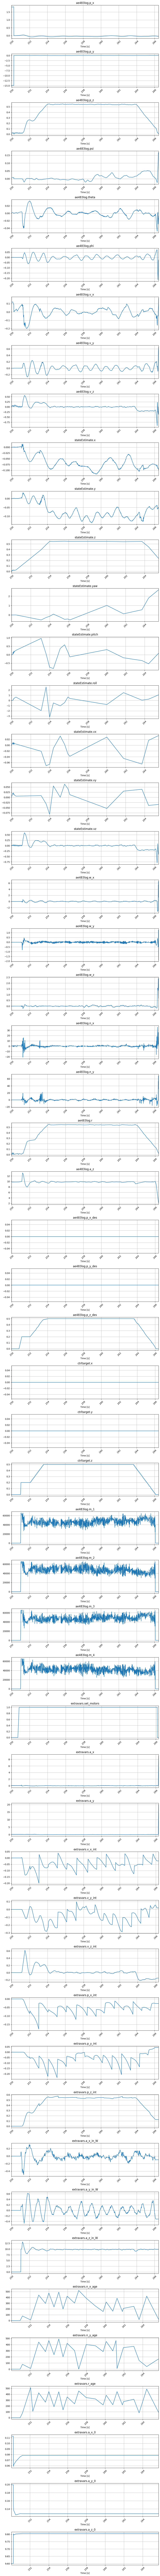

In [30]:
# User-defined time trim (in seconds)
start_trim = 0
end_trim = 0

# Determine the number of subplots based on the number of keys
num_plots = len(drone_data)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), sharex=False)

# If there's only one key, make axes a list for compatibility
if num_plots == 1:
    axes = [axes]

# Iterate over each key in the drone data and create a subplot
for idx, (key, value) in enumerate(drone_data.items()):
    time_data = value.get("time", [])
    y_data = value.get("data", [])

    # Convert start_trim and end_trim times to indices
    start_index = next((i for i, t in enumerate(time_data) if t >= start_trim), 0)
    end_index = next((i for i, t in enumerate(time_data) if t >= time_data[-1] - end_trim), len(time_data))

    # Apply trimming based on time values
    trimmed_time_data = time_data[start_index:end_index]
    trimmed_y_data = y_data[start_index:end_index]

    # Plot the trimmed time vs. data for each key
    axes[idx].plot(trimmed_time_data, trimmed_y_data)
    
    # Set title and labels
    axes[idx].set_title(key)
    axes[idx].set_ylabel('')  # Leave y-axis label empty
    axes[idx].set_xlabel('Time [s]')
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    axes[idx].grid()

    # Set x-axis limits to match the data range for each subplot
    axes[idx].set_xlim([trimmed_time_data[0], trimmed_time_data[-1]])

    # Prevent scientific notation on y-axis
    axes[idx].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.tight_layout()
plt.show()

232
232
232
587
587
587
587
587
574
574
574
207
41
41
212
212
270
270
270
270
270
42
42
42


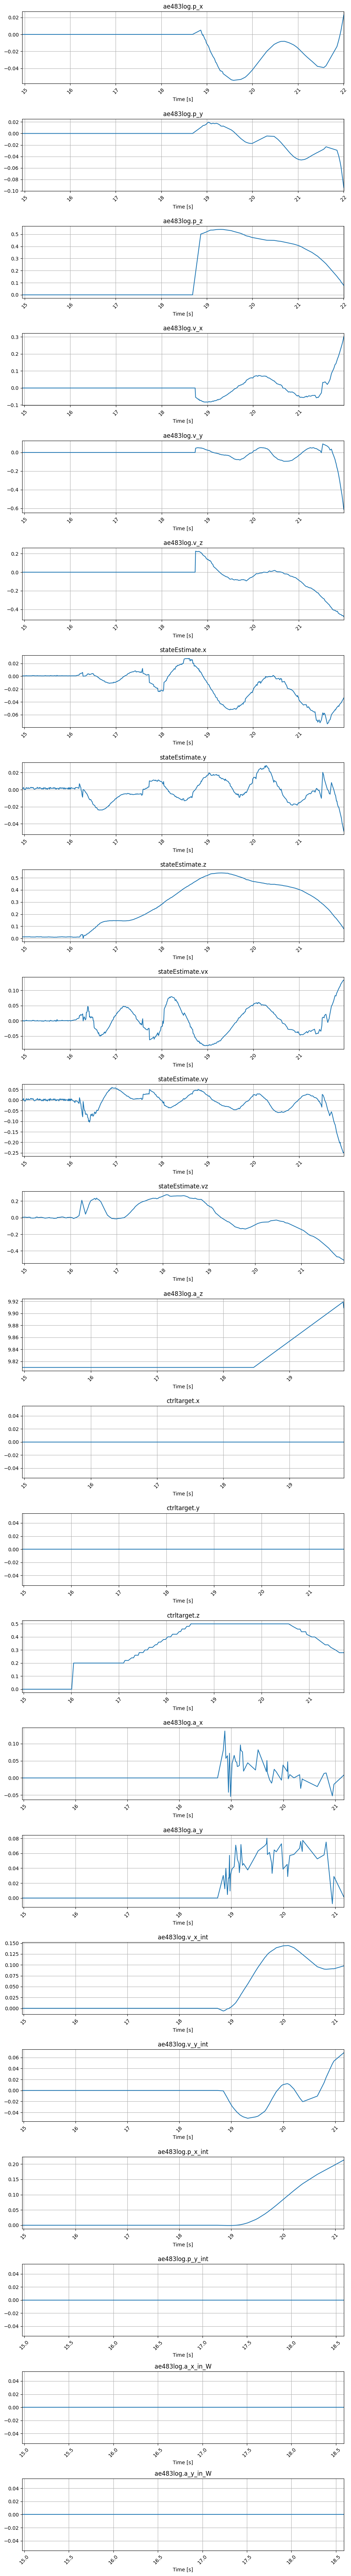

In [12]:
def plot_drone_data(file_path, plot_keys, start_trim=0, end_trim=0):
    # Load the JSON data from the file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract the "drone" data
    drone_data = data.get("drone", {})

    # Filter data to include only specified plot keys
    filtered_data = {key: value for key, value in drone_data.items() if key in plot_keys}

    # Determine the number of subplots based on the number of keys in filtered data
    num_plots = len(filtered_data)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), sharex=False)

    # If there's only one key, make axes a list for compatibility
    if num_plots == 1:
        axes = [axes]

    # Iterate over each key in the filtered drone data and create a subplot
    for idx, (key, value) in enumerate(filtered_data.items()):
        time_data = value.get("time", [])
        y_data = value.get("data", [])

        # Convert start_trim and end_trim times to indices
        start_index = next((i for i, t in enumerate(time_data) if t >= start_trim), 0)
        end_index = next((i for i, t in enumerate(time_data) if t >= time_data[-1] - end_trim), len(time_data))

        # Apply trimming based on time values
        trimmed_time_data = time_data[start_index:end_index]
        trimmed_y_data = y_data[start_index:end_index]
        print(end_index)

        # Plot the trimmed time vs. data for each key
        # axes[idx].plot(trimmed_time_data, np.rad2deg(trimmed_y_data))
        axes[idx].plot(trimmed_time_data, trimmed_y_data)
        
        # Set title and labels
        axes[idx].set_title(key)
        axes[idx].set_ylabel('')  # Leave y-axis label empty
        axes[idx].set_xlabel('Time [s]')
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        axes[idx].grid()

        # Set x-axis limits to match the data range for each subplot
        axes[idx].set_xlim([trimmed_time_data[0], trimmed_time_data[-1]])

        # Prevent scientific notation on y-axis
        axes[idx].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

    plt.tight_layout()
    plt.show()

# Example usage
# plot_keys = ["ae483log.n_x", 
#              "ae483log.n_y",
#              "ae483log.r",
#              "ae483log.a_z",
#              "ae483log.p_z_des",
#              "ae483log.m_1"]
plot_keys = [
"ae483log.p_x",
"ae483log.p_y",
"ae483log.p_z",
# "ae483log.psi",
# "ae483log.theta",
# "ae483log.phi",
"ae483log.v_x",
"ae483log.v_y",
"ae483log.v_z",
"stateEstimate.x",
"stateEstimate.y",
"stateEstimate.z",
# "stateEstimate.yaw",
# "stateEstimate.pitch",
# "stateEstimate.roll",
"stateEstimate.vx",
"stateEstimate.vy",
"stateEstimate.vz",
# "ae483log.w_x",
# "ae483log.w_y",
# "ae483log.w_z",
# "ae483log.n_x",
# "ae483log.n_y",
# "ae483log.r",
"ae483log.a_z",
# "ae483log.p_x_des",
# "ae483log.p_y_des",
# "ae483log.p_z_des",
"ctrltarget.x",
"ctrltarget.y",
"ctrltarget.z",
# "ae483log.m_1",
# "ae483log.m_2",
# "ae483log.m_3",
# "ae483log.m_4",
# "ae483log.set_motors",
"ae483log.a_x",
"ae483log.a_y",
"ae483log.v_x_int",
"ae483log.v_y_int",
"ae483log.p_x_int",
"ae483log.p_y_int",
"ae483log.a_x_in_W",
"ae483log.a_y_in_W"]

             
plot_drone_data('hardware.json', plot_keys, start_trim=0, end_trim=1)

242
242
226
299
299
299
295
295
295


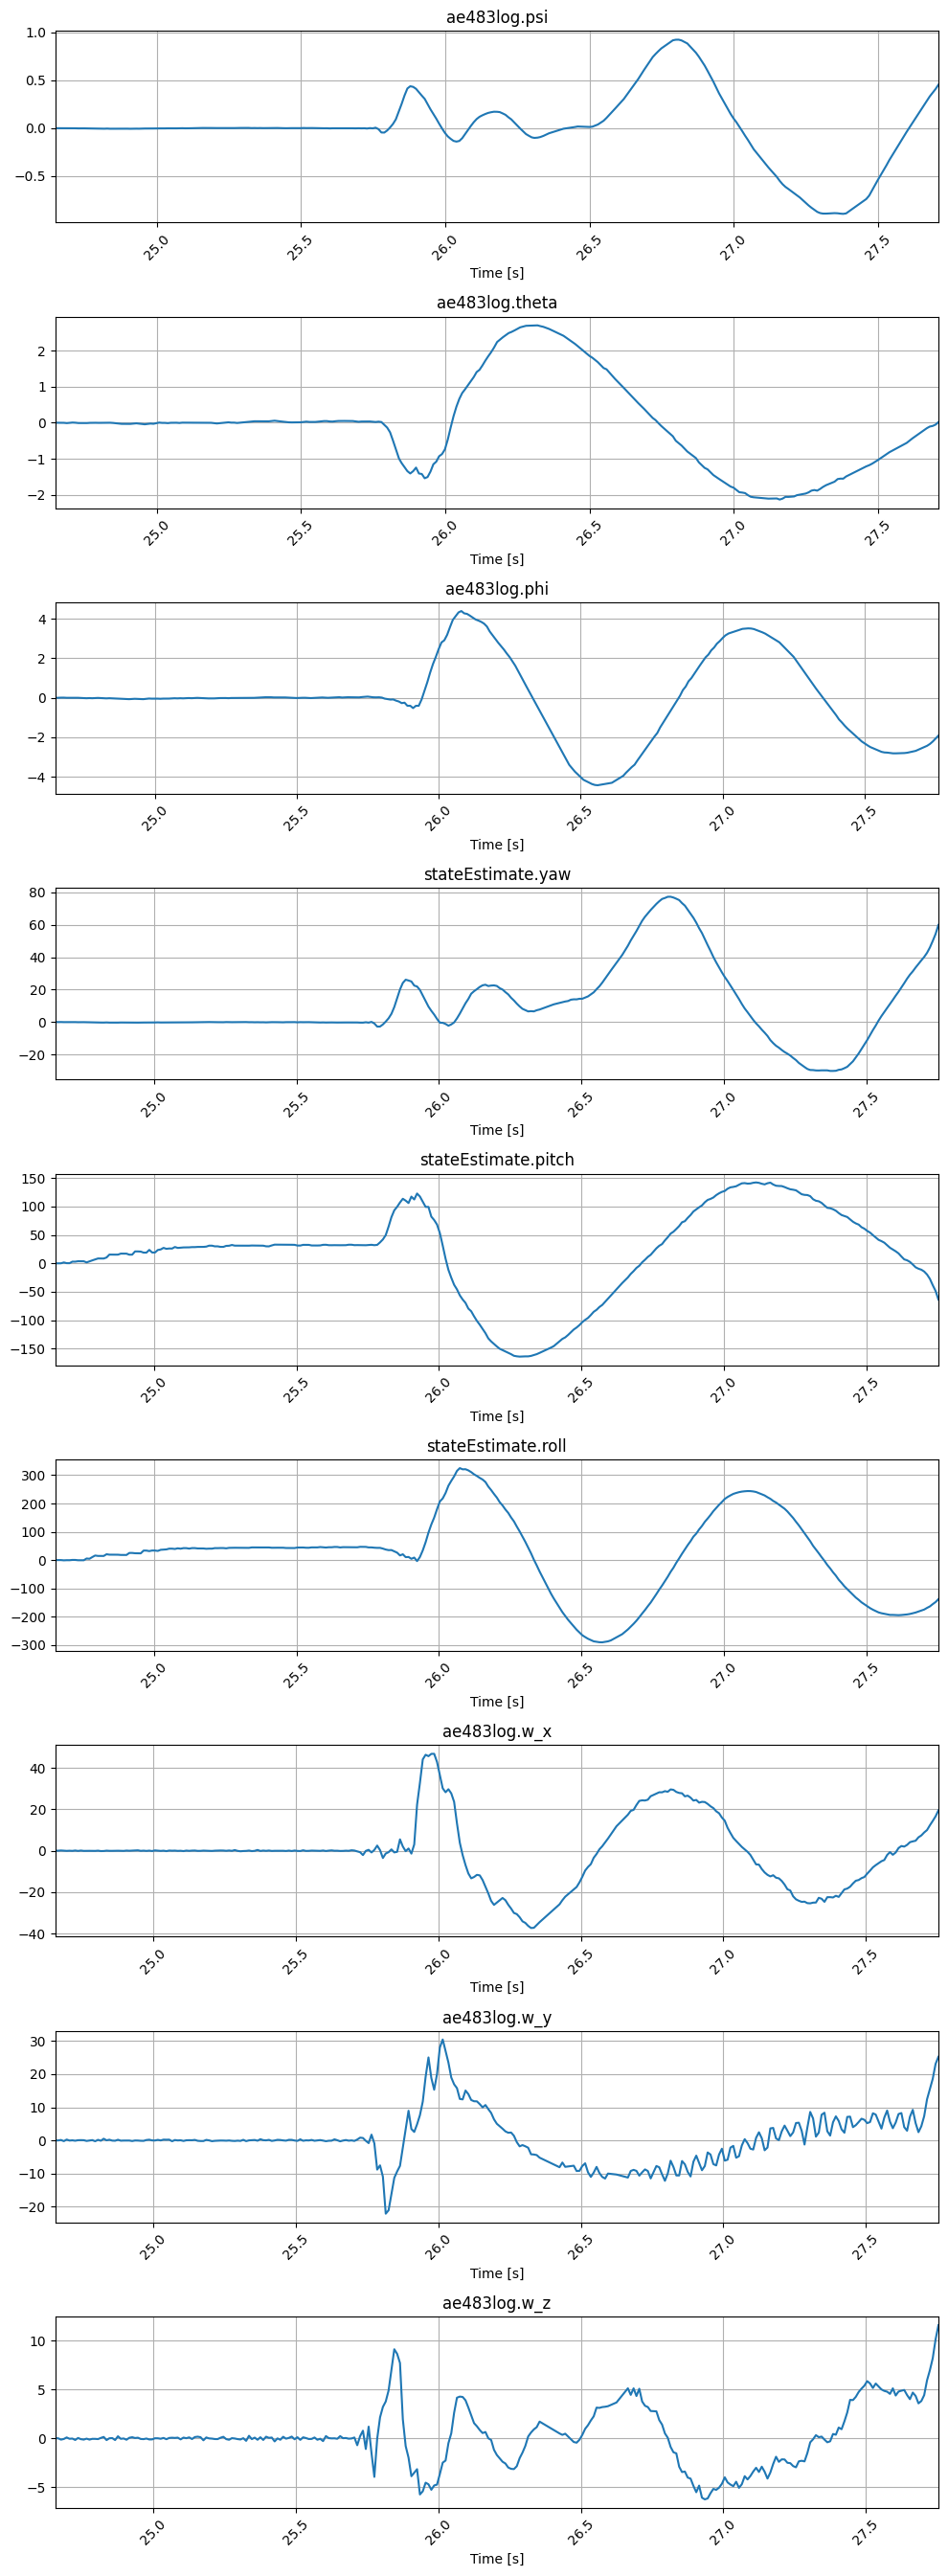

In [8]:
plot_keys = [
            #  "ae483log.p_x",
            #  "ae483log.p_y",
            #  "ae483log.p_z",
             "ae483log.psi",
             "ae483log.theta",
             "ae483log.phi",
            #  "ae483log.v_x",
            #  "ae483log.v_y",
            #  "ae483log.v_z",
            #  "stateEstimate.x",
            #  "stateEstimate.y",
            #  "stateEstimate.z",
             "stateEstimate.yaw",
             "stateEstimate.pitch",
             "stateEstimate.roll",
            #  "stateEstimate.vx",
            #  "stateEstimate.vy",
            #  "stateEstimate.vz",
             "ae483log.w_x",
             "ae483log.w_y",
             "ae483log.w_z",
            #  "ae483log.n_x",
            #  "ae483log.n_y",
            #  "ae483log.r",
            #  "ae483log.a_z",
            #  "ae483log.p_x_des",
            #  "ae483log.p_y_des",
            #  "ae483log.p_z_des",
            #  "ctrltarget.x",
            #  "ctrltarget.y",
            #  "ctrltarget.z",
            #  "ae483log.m_1",
            #  "ae483log.m_2",
            #  "ae483log.m_3",
            #  "ae483log.m_4"
             ]

plot_drone_data('lab08_takeoff_05.json', plot_keys, start_trim=0, end_trim=0.5)

In [39]:
with open('hardware.json', 'r') as file:
    data = json.load(file)

# Extract the "drone" data
drone_data = data.get("drone", {})

for key in drone_data.keys():
    print(f"The min and max of {key} is {np.min(drone_data[key]['data'])} and {np.max(drone_data[key]['data'])}")


The min and max of ae483log.p_x is -0.011354281567037106 and 0.031715184450149536
The min and max of ae483log.p_y is -0.001448918948881328 and 1.2956165075302124
The min and max of ae483log.p_z is 0.0 and 0.028377005830407143
The min and max of ae483log.psi is -0.0008286748197861016 and 7.786842616042122e-05
The min and max of ae483log.theta is -0.004087034612894058 and 0.002501113573089242
The min and max of ae483log.phi is -0.007216327358037233 and 0.010660581290721893
The min and max of ae483log.v_x is -0.037124231457710266 and 0.03844472020864487
The min and max of ae483log.v_y is -0.010096536949276924 and 0.20518861711025238
The min and max of ae483log.v_z is -0.030120261013507843 and 0.03384922817349434
The min and max of stateEstimate.x is -0.0015740793896839023 and 0.001433307770639658
The min and max of stateEstimate.y is -0.004208850674331188 and 0.002247266238555312
The min and max of stateEstimate.z is 0.012708966620266438 and 0.3373277187347412
The min and max of stateEsti

In [46]:
with open('hardware.json', 'r') as file:
    data = json.load(file)

# Extract the "drone" data
drone_data = data.get("drone", {})

data = np.array(drone_data['extravars.set_motors']['data'])
time_data = np.array(drone_data['extravars.set_motors']['time'])

# Detect the first index where the data switches from 1 to 0
switch_index = np.where((data[:-1] == 1) & (data[1:] == 0))[0][0] + 1  # +1 for the transition point

# Get the time at the switch point
switch_time = time_data[switch_index-1]

print(switch_time)

def closest_time_index(time_array, target_time):
    return (np.abs(time_array - target_time)).argmin()

for key in drone_data.keys():
    if 'time' in drone_data[key]:  # Ensure the key contains a time array
        closest_index = closest_time_index(np.array(drone_data[key]['time']), switch_time)
        data_at_time = drone_data[key]['data'][closest_index]
        print(f"{key} at time closest time: {data_at_time}")

37.594
ae483log.p_x at time closest time: 0.0
ae483log.p_y at time closest time: 0.0
ae483log.p_z at time closest time: 0.0
ae483log.psi at time closest time: 0.0
ae483log.theta at time closest time: 0.0
ae483log.phi at time closest time: 0.0
ae483log.v_x at time closest time: 0.0
ae483log.v_y at time closest time: 0.0
ae483log.v_z at time closest time: 0.0
stateEstimate.x at time closest time: 0.000497087836265564
stateEstimate.y at time closest time: 0.0017431235173717141
stateEstimate.z at time closest time: 0.022574197500944138
stateEstimate.yaw at time closest time: 0.00010365482012275606
stateEstimate.pitch at time closest time: 0.05355209857225418
stateEstimate.roll at time closest time: 0.15413068234920502
stateEstimate.vx at time closest time: 0.0042047505266964436
stateEstimate.vy at time closest time: 0.015760203823447227
stateEstimate.vz at time closest time: 0.01566837914288044
ae483log.w_x at time closest time: 0.0
ae483log.w_y at time closest time: 0.0
ae483log.w_z at ti